In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data\Qualitative Bankruptcy\Qualitative_Bankruptcy.data.txt' , header=None) 
df.columns = ['Industrial_risk' , 'Management_risk' , 'Financial_flexibility' , 'Credibility' , 'Competiveness' , 'Operating_risk' , 'Result']
df.head()

,Industrial_risk,Management_risk,Financial_flexibility,Credibility,Competiveness,Operating_risk,Result
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [3]:
df.replace({'P' : 1 , 'A' : 0 , 'N':-1 , 'NB' : 0 , 'B' : 1} , inplace=True)
df.head()

,Industrial_risk,Management_risk,Financial_flexibility,Credibility,Competiveness,Operating_risk,Result
0,1,1,0,0,0,1,0
1,-1,-1,0,0,0,-1,0
2,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0
4,-1,-1,1,1,1,-1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Industrial_risk        250 non-null    int64
 1   Management_risk        250 non-null    int64
 2   Financial_flexibility  250 non-null    int64
 3   Credibility            250 non-null    int64
 4   Competiveness          250 non-null    int64
 5   Operating_risk         250 non-null    int64
 6   Result                 250 non-null    int64
dtypes: int64(7)
memory usage: 13.8 KB


In [5]:
df['Result'].value_counts()

Result
0    143
1    107
Name: count, dtype: int64

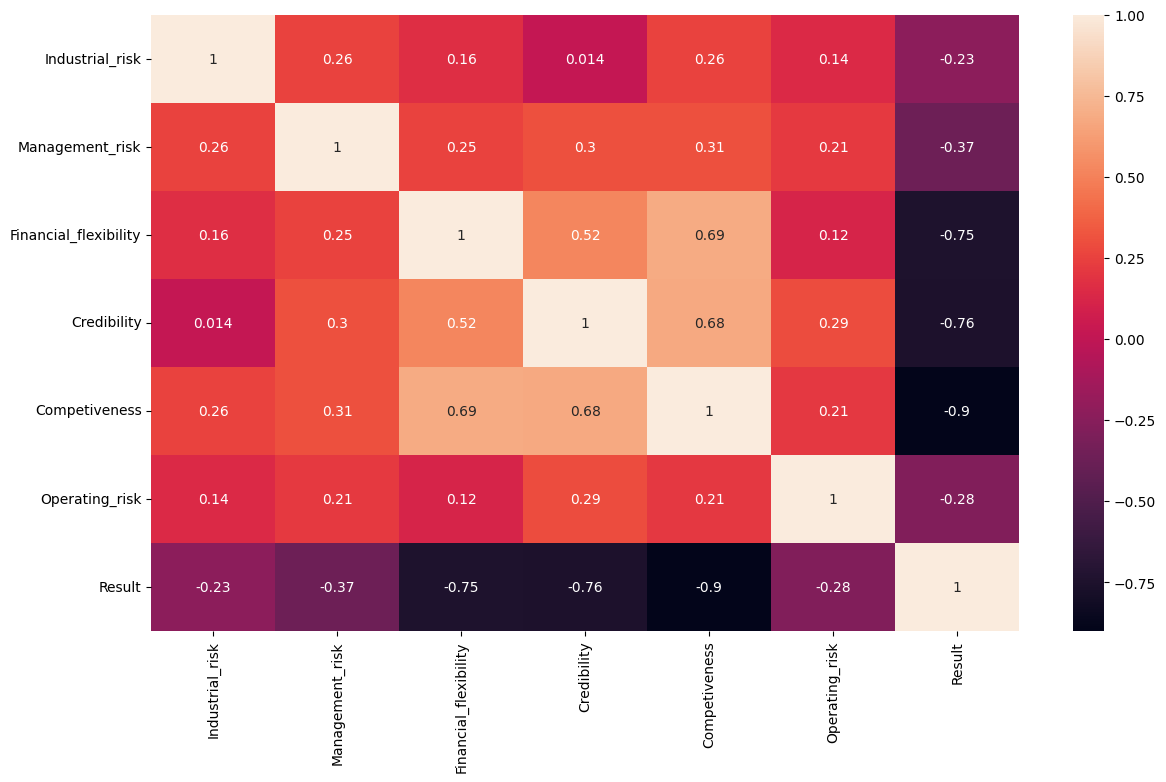

In [6]:
plt.figure(figsize=(14,8) ,dpi=100)

sns.heatmap(df.corr() , annot = True);

In [7]:
df.groupby('Result').mean()

,Industrial_risk,Management_risk,Financial_flexibility,Credibility,Competiveness,Operating_risk
Result,,,,,,
0,0.125874,0.034965,0.272727,0.482517,0.636364,0.069930
1,-0.252336,-0.579439,-0.943925,-0.785047,-0.962617,-0.420561


In [8]:
cat_col = list(df.columns.drop('Result'))

for col in cat_col:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Industrial_risk        250 non-null    category
 1   Management_risk        250 non-null    category
 2   Financial_flexibility  250 non-null    category
 3   Credibility            250 non-null    category
 4   Competiveness          250 non-null    category
 5   Operating_risk         250 non-null    category
 6   Result                 250 non-null    int64   
dtypes: category(6), int64(1)
memory usage: 4.3 KB


# Utils

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN



class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , label=label , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
        print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
        print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
        print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
        
        
        print("\n****************\n")
        
        print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
        print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
        print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
        print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        
    def get_f1_score(y_true, y_pred , name='Model'):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred , name='Model'):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred , name='Model'):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
    
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='classification'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional
            Datamızın task'i, by default 'classification'.
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

## X and y

In [10]:
X = df.drop('Result' , axis = 1)
y = df['Result']

## OverSample

In [11]:
# X_resampled , y_resampled = fonks.overSample(X , y , tactic='smote')

In [12]:
# cat_col = list(df.columns.drop('Result'))

# for col in cat_col:
#     df[col] = df[col].astype('category')

## Train | Test Split

In [13]:
X_train , X_test, y_train , y_test = fonks.trainTest(X , y)

# Models

### Gaussian NB

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_test)

fonks.simple_scores(y_train, nb_train_pred , y_test , nb_pred)

Model Train Accuracy : 0.98
Model Train Recall : 0.9487179487179487
Model Train Precision : 1.0
Model Train F1 : 0.9736842105263158

****************

Model Test Accuracy : 0.98
Model Test Recall : 0.9655172413793104
Model Test Precision : 1.0
Model Test F1 : 0.9824561403508771


In [15]:
fonks.eval_metric(y_train, nb_train_pred , y_test , nb_pred , 'NB')

Test_Set NB
[[21  0]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50


Train_Set NB
[[122   0]
 [  4  74]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       122
           1       1.00      0.95      0.97        78

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



In [16]:
nb_f1 = fonks.get_f1_score(y_test , nb_pred , "NB")
nb_recall = fonks.get_recall(y_test , nb_pred , "NB")
# nb_rocauc = fonks.get_roc_auc(y_test , nb_pred , "NB")
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')
nb_rocauc = 0.98


nb_df = fonks.train_test_df(y_train, nb_train_pred , y_test , nb_pred , 'NB')
nb_df

,NB_train,NB_test
Accuracy,0.980000,0.980000
Recall,0.948718,0.965517
Precision,1.000000,1.000000
F1,0.986754,0.991189


## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import dpctl
from sklearnex import patch_sklearn, config_context , unpatch_sklearn

patch_sklearn()

dt_base = DecisionTreeClassifier()

params = {'max_depth' : np.arange(2,11) , 'min_samples_split' : np.arange(2,8) , 'max_features' : np.arange(2,10)}

dt_grid = GridSearchCV(dt_base , params , scoring='accuracy' , cv = 5) 
dt_grid.fit(X_train , y_train)

print(f'Best parameters: {dt_grid.best_params_}')
print(f'Best score: {dt_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'max_depth': 5, 'max_features': 2, 'min_samples_split': 2}
Best score: 1.00


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 4 , max_features= 2 , min_samples_split= 3)
# dt = dt_grid.best_estimator_
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred)

Model Train Accuracy : 1.0
Model Train Recall : 1.0
Model Train Precision : 1.0
Model Train F1 : 1.0

****************

Model Test Accuracy : 1.0
Model Test Recall : 1.0
Model Test Precision : 1.0
Model Test F1 : 1.0


In [19]:
fonks.eval_metric(y_train, dt_train_pred , y_test , dt_pred , 'DT')

Test_Set DT
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set DT
[[122   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [20]:
dt_f1 = fonks.get_f1_score(y_test , dt_pred , "DT")
dt_recall = fonks.get_recall(y_test , dt_pred , "DT")
# dt_rocauc = fonks.get_roc_auc(y_test , dt_pred , "DT")
# dt_rocauc = roc_auc_score(np.array(y_test.values), dt_pred, multi_class='ovr' , average='micro')

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([nb_df , dt_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test
Accuracy,0.980000,0.980000,1.0,1.0
Recall,0.948718,0.965517,1.0,1.0
Precision,1.000000,1.000000,1.0,1.0
F1,0.986754,0.991189,1.0,1.0


## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_test)

fonks.simple_scores(y_train, knn_train_pred , y_test , knn_pred)

Model Train Accuracy : 0.995
Model Train Recall : 0.9871794871794872
Model Train Precision : 1.0
Model Train F1 : 0.9935483870967742

****************

Model Test Accuracy : 1.0
Model Test Recall : 1.0
Model Test Precision : 1.0
Model Test F1 : 1.0


In [22]:
fonks.eval_metric(y_train, knn_train_pred , y_test , knn_pred , 'KNN')

Test_Set KNN
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set KNN
[[122   0]
 [  1  77]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      0.99        78

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [23]:
knn_f1 = fonks.get_f1_score(y_test , knn_pred , "KNN")
knn_recall = fonks.get_recall(y_test , knn_pred , "KNN")
# knn_rocauc = fonks.get_roc_auc(y_test , knn_pred , "KNN")

knn_df = fonks.train_test_df(y_train, knn_train_pred , y_test , knn_pred , 'KNN')
all_df = pd.concat([all_df , knn_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test
Accuracy,0.980000,0.980000,1.0,1.0,0.995000,1.0
Recall,0.948718,0.965517,1.0,1.0,0.987179,1.0
Precision,1.000000,1.000000,1.0,1.0,1.000000,1.0
F1,0.986754,0.991189,1.0,1.0,0.996769,1.0


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearnex import patch_sklearn, config_context , unpatch_sklearn
import dpctl

patch_sklearn()

with config_context(target_offload='gpu:0'):
        log_base = LogisticRegression(random_state= 53 , max_iter= 1000000)

        params = {'penalty' : ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 3, 5, 10 ,25, 50 , 100 , 200 , 300 , 500 ,750] ,
                'solver' : ['lbfgs' , 'liblinear']}

        log_grid = RandomizedSearchCV(log_base , params , scoring='accuracy' , cv = 5 , n_iter=50)
        log_grid.fit(X_train , y_train)

print(f'Best parameters: {log_grid.best_params_}')
print(f'Best score: {log_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Best score: 0.99


c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py", line 54

In [25]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver = 'liblinear' , penalty= 'l1' , C= 0.1 , max_iter=10000) 
# log = log_grid.best_estimator_
log.fit(X_train , y_train)

log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

fonks.simple_scores(y_train, log_train_pred , y_test , log_pred , 'Log')

Log Train Accuracy : 0.995
Log Train Recall : 1.0
Log Train Precision : 0.9873417721518988
Log Train F1 : 0.9936305732484078

****************

Log Test Accuracy : 1.0
Log Test Recall : 1.0
Log Test Precision : 1.0
Log Test F1 : 1.0


In [26]:
fonks.eval_metric(y_train, log_train_pred , y_test , log_pred , 'Log')

Test_Set Log
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set Log
[[121   1]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.99      1.00      0.99        78

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [27]:
log_f1 = fonks.get_f1_score(y_test , log_pred , "Log")
log_recall = fonks.get_recall(y_test , log_pred , "Log")
# log_rocauc = fonks.get_roc_auc(y_test , log_pred , "Log")

log_df = fonks.train_test_df(y_train, log_train_pred , y_test , log_pred , 'Log')
all_df = pd.concat([all_df, log_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test
Accuracy,0.980000,0.980000,1.0,1.0,0.995000,1.0,0.995000,1.0
Recall,0.948718,0.965517,1.0,1.0,0.987179,1.0,1.000000,1.0
Precision,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.987342,1.0
F1,0.986754,0.991189,1.0,1.0,0.996769,1.0,0.996810,1.0


## SVC

In [28]:
from sklearn.svm import SVC
from sklearnex import patch_sklearn, config_context

patch_sklearn()

with config_context(target_offload='gpu:0'):

    svc_base = SVC(random_state= 53)

    params = {'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid'] , 'degree' : [2,3,4] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,5) }

    svc_grid = GridSearchCV(svc_base , params , scoring='accuracy' , cv = 5 )
    svc_grid.fit(X_train,y_train)

print(f'Best parameters: {svc_grid.best_params_}')
print(f'Best score: {svc_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.99


In [29]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear' , gamma= 'scale' , C= 0.01 , degree= 2 , max_iter= 10000) 
# svc = svc_grid.best_estimator_
svc.fit(X_train , y_train)

svc_train_pred = svc.predict(X_train)
svc_pred = svc.predict(X_test)

fonks.simple_scores(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

SVC Train Accuracy : 0.995
SVC Train Recall : 0.9871794871794872
SVC Train Precision : 1.0
SVC Train F1 : 0.9935483870967742

****************

SVC Test Accuracy : 1.0
SVC Test Recall : 1.0
SVC Test Precision : 1.0
SVC Test F1 : 1.0


In [30]:
fonks.eval_metric(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

Test_Set SVC
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set SVC
[[122   0]
 [  1  77]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      0.99        78

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [31]:
svc_f1 = fonks.get_f1_score(y_test , svc_pred , "SVC")
svc_recall = fonks.get_recall(y_test , svc_pred , "SVC")
# svc_rocauc = fonks.get_roc_auc(y_test , svc_pred , "SVC")

svc_df = fonks.train_test_df(y_train, svc_train_pred , y_test , svc_pred , 'SVC')
all_df = pd.concat([all_df, svc_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test
Accuracy,0.980000,0.980000,1.0,1.0,0.995000,1.0,0.995000,1.0,0.995000,1.0
Recall,0.948718,0.965517,1.0,1.0,0.987179,1.0,1.000000,1.0,0.987179,1.0
Precision,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.987342,1.0,1.000000,1.0
F1,0.986754,0.991189,1.0,1.0,0.996769,1.0,0.996810,1.0,0.996769,1.0


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearnex import patch_sklearn, config_context

patch_sklearn()

with config_context(target_offload='gpu:0'):
    rf_base = RandomForestClassifier(random_state= 53)

    params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt',2,3,4]
    }


    rf_grid = GridSearchCV(rf_base , params , scoring='accuracy' , cv = 5 )
    rf_grid.fit(X_train,y_train)

print(f'Best parameters: {rf_grid.best_params_}')
print(f'Best score: {rf_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Best score: 1.00


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500 , max_features= 'sqrt' , max_depth = 3 , min_samples_split=10 , min_samples_leaf=1)
# rf = rf_grid.best_estimator_
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

RF Train Accuracy : 1.0
RF Train Recall : 1.0
RF Train Precision : 1.0
RF Train F1 : 1.0

****************

RF Test Accuracy : 1.0
RF Test Recall : 1.0
RF Test Precision : 1.0
RF Test F1 : 1.0


In [34]:
fonks.eval_metric(y_train, rf_train_pred , y_test , rf_pred , 'RF')

Test_Set RF
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set RF
[[122   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [35]:
rf_f1 = fonks.get_f1_score(y_test , rf_pred , "RF")
rf_recall = fonks.get_recall(y_test , rf_pred , "RF")
# svc_rocauc = fonks.get_roc_auc(y_test , svc_pred , "SVC")

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_test , rf_pred , 'RF')
all_df = pd.concat([all_df, rf_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test
Accuracy,0.980000,0.980000,1.0,1.0,0.995000,1.0,0.995000,1.0,0.995000,1.0,1.0,1.0
Recall,0.948718,0.965517,1.0,1.0,0.987179,1.0,1.000000,1.0,0.987179,1.0,1.0,1.0
Precision,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.987342,1.0,1.000000,1.0,1.0,1.0
F1,0.986754,0.991189,1.0,1.0,0.996769,1.0,0.996810,1.0,0.996769,1.0,1.0,1.0


## Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
import dpctl
from sklearnex import patch_sklearn, config_context

patch_sklearn()

with config_context(target_offload='gpu:0'):
        gb_base = GradientBoostingClassifier()

        params = {'learning_rate' : [0.001,0.01,0.1,1],
                'n_estimators' : [80 , 100 , 150 , 200 , 300 , 400 , 500],
                'min_samples_split' : np.arange(2,7),
                'max_depth' : np.arange(2,10),
                }

        gb_rand = RandomizedSearchCV(gb_base , params , scoring='accuracy' , cv = 5 , n_iter= 50)
        gb_rand.fit(X_train,y_train)


print(f'Best parameters: {gb_rand.best_params_}')
print(f'Best score: {gb_rand.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 7, 'learning_rate': 0.001}
Best score: 1.00


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=300 , min_samples_split=2, max_depth=7 , learning_rate=0.001)
# gb = gb_rand.best_estimator_
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

GB Train Accuracy : 1.0
GB Train Recall : 1.0
GB Train Precision : 1.0
GB Train F1 : 1.0

****************

GB Test Accuracy : 1.0
GB Test Recall : 1.0
GB Test Precision : 1.0
GB Test F1 : 1.0


In [38]:
fonks.eval_metric(y_train, gb_train_pred , y_test , gb_pred , 'GB')

Test_Set GB
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set GB
[[122   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [39]:
gb_f1 = fonks.get_f1_score(y_test , gb_pred , "GB")
gb_recall = fonks.get_recall(y_test , gb_pred , "GB")
# gb_rocauc = fonks.get_roc_auc(y_test , gb_pred , "GB")

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df, gb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test
Accuracy,0.980000,0.980000,1.0,1.0,0.995000,1.0,0.995000,1.0,0.995000,1.0,1.0,1.0,1.0,1.0
Recall,0.948718,0.965517,1.0,1.0,0.987179,1.0,1.000000,1.0,0.987179,1.0,1.0,1.0,1.0,1.0
Precision,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.987342,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
F1,0.986754,0.991189,1.0,1.0,0.996769,1.0,0.996810,1.0,0.996769,1.0,1.0,1.0,1.0,1.0


## XGBoost

In [ ]:
# y_train_xgb = y_train.replace({1:0 , 2:1 ,3:2 , 4:3}).astype(int)
# y_test_xgb = y_test.replace({1:0 , 2:1 ,3:2 , 4:3}).astype(int)

In [41]:
from xgboost import XGBClassifier
from sklearnex import patch_sklearn,config_context
import dpctl

patch_sklearn()

with config_context(target_offload="gpu:0"):
    xgb_base = XGBClassifier(tree_method="gpu_hist",
                             gpu_id=0,
                             enable_categorical = True)

    params = {'learning_rate' : [0.01,0.1,1],
            'n_estimators' : [80 , 100 , 150 , 200 , 300],
            'subsample': [0.5 , 0.7 , 0.8 , 1],
            'colsample_bytree' : [0.5 , 0.7 , 0.8 , 1],
            'max_depth' : np.arange(2,8),
            }

    xgb_grid = GridSearchCV(xgb_base , params , scoring='accuracy' , cv = 3)
    xgb_grid.fit(X_train,y_train)


print(f'Best parameters: {xgb_grid.best_params_}')
print(f'Best score: {xgb_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 80, 'subsample': 0.8}
Best score: 0.99


In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

XGB Train Accuracy : 1.0
XGB Train Recall : 1.0
XGB Train Precision : 1.0
XGB Train F1 : 1.0

****************

XGB Test Accuracy : 1.0
XGB Test Recall : 1.0
XGB Test Precision : 1.0
XGB Test F1 : 1.0


In [45]:
fonks.eval_metric(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

Test_Set XGB
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set XGB
[[122   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [46]:
xgb_f1 = fonks.get_f1_score(y_test , xgb_pred , "XGB")
xgb_recall = fonks.get_recall(y_test , xgb_pred , "XGB")
# xgb_rocauc = fonks.get_roc_auc(y_test_xgb , xgb_pred , "XGB")

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')
all_df = pd.concat([all_df, xgb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test
Accuracy,0.980000,0.980000,1.0,1.0,0.995000,1.0,0.995000,1.0,0.995000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Recall,0.948718,0.965517,1.0,1.0,0.987179,1.0,1.000000,1.0,0.987179,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.987342,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F1,0.986754,0.991189,1.0,1.0,0.996769,1.0,0.996810,1.0,0.996769,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## LightGBM

In [47]:
from lightgbm import LGBMClassifier

patch_sklearn()

with config_context(target_offload='gpu:0'):
        lgb_base = LGBMClassifier(device = 'gpu')

        params = {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7 , 6 , 7, 8],
                'learning_rate': [1,0.1,0.01],
                'subsample': [0.7,0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0],
                }

        lgb_grid = GridSearchCV(lgb_base , params , scoring='accuracy' , cv = 3)
        lgb_grid.fit(X_train,y_train)


print(f'Best parameters: {lgb_grid.best_params_}')
print(f'Best score: {lgb_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best score: 0.99


In [48]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators= 100 , learning_rate = 1 , max_depth = 3 , subsample = 0.7 , colsample_bytree = 0.8)
# lgb = lgb_grid.best_estimator_
lgb.fit(X_train , y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)

fonks.simple_scores(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

LGB Train Accuracy : 1.0
LGB Train Recall : 1.0
LGB Train Precision : 1.0
LGB Train F1 : 1.0

****************

LGB Test Accuracy : 1.0
LGB Test Recall : 1.0
LGB Test Precision : 1.0
LGB Test F1 : 1.0


In [49]:
fonks.eval_metric(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

Test_Set LGB
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set LGB
[[122   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [50]:
lgb_f1 = fonks.get_f1_score(y_test , lgb_pred , "LGB")
lgb_recall = fonks.get_recall(y_test , lgb_pred , "LGB")
# xgb_rocauc = fonks.get_roc_auc(y_test_xgb , xgb_pred , "XGB")

lgb_df = fonks.train_test_df(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')
all_df = pd.concat([all_df, lgb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test
Accuracy,0.980000,0.980000,1.0,1.0,0.995000,1.0,0.995000,1.0,0.995000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Recall,0.948718,0.965517,1.0,1.0,0.987179,1.0,1.000000,1.0,0.987179,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.987342,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F1,0.986754,0.991189,1.0,1.0,0.996769,1.0,0.996810,1.0,0.996769,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Cat Boost

In [53]:
df.columns.drop('Result')

Index(['Industrial_risk', 'Management_risk', 'Financial_flexibility',
       'Credibility', 'Competiveness', 'Operating_risk'],
      dtype='object')

In [56]:
from catboost import CatBoostClassifier
from sklearnex import patch_sklearn , config_context

patch_sklearn()

with config_context(target_offload='gpu:0'):
        cb_base = CatBoostClassifier(task_type="GPU", devices='gpu:0', cat_features= list(df.columns.drop('Result')))

        params = {
                'iterations': [100, 200, 300, 400],
                'depth': [3, 5, 7, 9],
                'learning_rate': [1, 0.1, 0.01, ],
                'random_seed': [53],
                }

        cb_grid = GridSearchCV(cb_base , params , scoring='accuracy' , cv = 3 )
        cb_grid.fit(X_train,y_train)


print(f'Best parameters: {cb_grid.best_params_}')
print(f'Best score: {cb_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0:	learn: 0.2649371	total: 3.09ms	remaining: 306ms
1:	learn: 0.1819261	total: 5.67ms	remaining: 278ms
2:	learn: 0.1563788	total: 7.69ms	remaining: 249ms
3:	learn: 0.1435423	total: 10ms	remaining: 241ms
4:	learn: 0.1385332	total: 11.9ms	remaining: 225ms
5:	learn: 0.1290763	total: 14.2ms	remaining: 223ms
6:	learn: 0.1257643	total: 16.6ms	remaining: 220ms
7:	learn: 0.1232987	total: 18.5ms	remaining: 213ms
8:	learn: 0.1221371	total: 20.8ms	remaining: 211ms
9:	learn: 0.1220272	total: 22.7ms	remaining: 204ms
10:	learn: 0.1215147	total: 24.9ms	remaining: 202ms
11:	learn: 0.1205083	total: 26.8ms	remaining: 197ms
12:	learn: 0.1158458	total: 29.1ms	remaining: 195ms
13:	learn: 0.1157773	total: 30.9ms	remaining: 190ms
14:	learn: 0.1154557	total: 33.3ms	remaining: 188ms
15:	learn: 0.1121294	total: 35.2ms	remaining: 185ms
16:	learn: 0.1075660	total: 37.6ms	remaining: 183ms
17:	learn: 0.1050488	total: 39.4ms	remaining: 179ms
18:	learn: 0.1029783	total: 41.7ms	remaining: 178ms
19:	learn: 0.0944045	tot

In [58]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations= 200 , learning_rate = 1 , depth = 5  , eval_metric='Accuracy' , random_state= 53 , task_type="GPU", devices='gpu:0', cat_features= list(df.columns.drop('Result')) )
# cb = cb_grid.best_estimator_
cb.fit(X_train , y_train , eval_set= (X_test, y_test))

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_test)

fonks.simple_scores(y_train, cb_train_pred , y_test , cb_pred , 'CatB')

0:	learn: 0.9900000	test: 1.0000000	best: 1.0000000 (0)	total: 11.2ms	remaining: 2.23s
1:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 22.5ms	remaining: 2.22s
2:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 34ms	remaining: 2.23s
3:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.9ms	remaining: 2.2s
4:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 56.3ms	remaining: 2.19s
5:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 67.4ms	remaining: 2.18s
6:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 78.3ms	remaining: 2.16s
7:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 89.5ms	remaining: 2.15s
8:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 101ms	remaining: 2.14s
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 110ms	remaining: 2.1s
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 123ms	remaining: 2.11s
11:	learn: 1.0000000	test: 1.0000000	best: 1.0000

In [59]:
fonks.eval_metric(y_train, cb_train_pred , y_test , cb_pred , 'CatB')

Test_Set CatB
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Train_Set CatB
[[122   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [60]:
cb_f1 = fonks.get_f1_score(y_test , cb_pred , "CatB")
cb_recall = fonks.get_recall(y_test , cb_pred , "CatB")
# xgb_rocauc = fonks.get_roc_auc(y_test_xgb , xgb_pred , "XGB")

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_test , cb_pred , 'CatB')
all_df = pd.concat([all_df, cb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test,CatB_train,CatB_test
Accuracy,0.980000,0.980000,1.0,1.0,0.995000,1.0,0.995000,1.0,0.995000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Recall,0.948718,0.965517,1.0,1.0,0.987179,1.0,1.000000,1.0,0.987179,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.987342,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F1,0.986754,0.991189,1.0,1.0,0.996769,1.0,0.996810,1.0,0.996769,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Compare Models

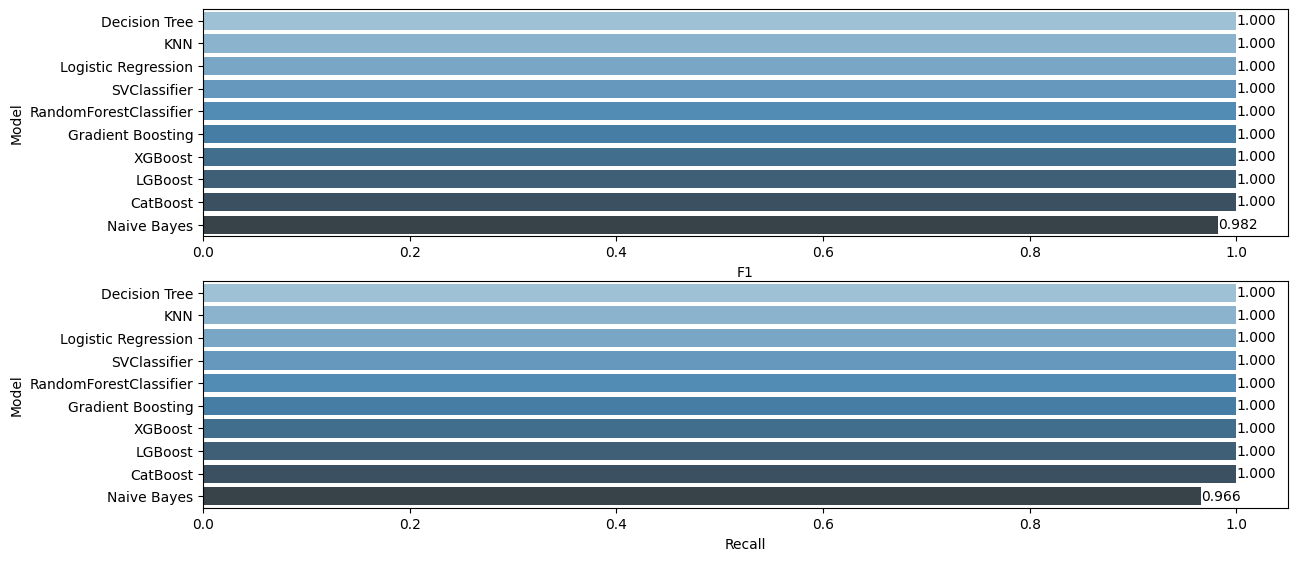

In [61]:
compare = pd.DataFrame({"Model": ["Naive Bayes", "Decision Tree", "KNN", "Logistic Regression", "SVClassifier", "RandomForestClassifier" ,"Gradient Boosting",
                                 "XGBoost", "LGBoost" , "CatBoost"],
                        "F1": [nb_f1, dt_f1, knn_f1, log_f1, svc_f1, rf_f1 , gb_f1, xgb_f1, lgb_f1 , cb_f1],
                        "Recall": [nb_recall, dt_recall, knn_recall, log_recall, svc_recall, rf_recall, gb_recall, xgb_recall, lgb_recall , cb_recall],
                        # "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

# plt.subplot(313)
# compare = compare.sort_values(by="ROC_AUC", ascending=False)
# ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
# labels(ax)
# plt.show()

In [62]:
# It was an easy task.

In [63]:
# Done